In [1]:
import pandas as pd
import io

C:\Users\Shivansh Tandon\AppData\Local\Temp\ipykernel_23660\1385340611.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df = pd.read_csv(r'C:\Users\Shivansh Tandon\Desktop\Heart Disease\Heart-Disease-Detection-Using-Machine-Learning\heart.csv') # retrieve dataset from drive
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

.
.
.
.

**Preprocessing**

In [6]:
df.isnull().sum() #checking for null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df = df.drop_duplicates() #drop duplicated values and verify
df_dup =df.duplicated().any()
df_dup

False

In [8]:
categorical_val = []
continuous_val = []

for column in df.columns :             #split the column into those that take categories
                                       #as value and those that take continuous as values
  if df[column].nunique() <= 10:
    categorical_val.append(column)
  else :
    continuous_val.append(column)

In [9]:
print("The columns that take categorical values are : \n", categorical_val)
print("\nThe columns that take continuous values are : \n", continuous_val)

The columns that take categorical values are : 
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

The columns that take continuous values are : 
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [10]:
categorical_val.remove('sex')                                        #remove sex and target column that are
categorical_val.remove('target')                                     # already in binary vector form
df = pd.get_dummies(df, columns = categorical_val, drop_first = True) # convert categorical columns into binary vectors

In [11]:
df.head() # verify if the dummy caolumns have been generated

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


**Encoding and Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
st = StandardScaler()
df[continuous_val] = st.fit_transform(df[continuous_val]) #scale continuous columns

In [14]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [15]:
x = df.drop('target', axis = 1)
y = df['target']

In [16]:
from sklearn.model_selection import train_test_split

Split the data into train and test dat

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


**Implement Linear Regression Model**

In [19]:
from sklearn.linear_model import LogisticRegression

In [21]:
log = LogisticRegression()
log.fit(xTrain, yTrain)

LogisticRegression()

In [22]:
yPrediction1 = log.predict(xTest)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(yTest, yPrediction1)

0.7868852459016393

**Implement Support Vector Classifier (SCV)**

In [25]:
from sklearn import svm
svm = svm.SVC()
svm.fit(xTrain, yTrain)

SVC()

In [26]:
yPrediction2 = svm.predict(xTest)

In [27]:
accuracy_score(yTest, yPrediction2)

0.8032786885245902

**Implement KNeighbours Classifier**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)

KNeighborsClassifier()

In [29]:
yPrediction3 = knn.predict(xTest)
accuracy_score(yTest, yPrediction3)

0.7377049180327869

In [30]:
score = []

for k in range(1,40) :
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(xTrain, yTrain)
  yPrediction3 = knn.predict(xTest)
  score.append(accuracy_score(yTest, yPrediction3))

In [31]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [32]:
maxAccuracyK = score.index(max(score)) + 1
maxAccuracyK

2

In [33]:
knn = KNeighborsClassifier(n_neighbors = maxAccuracyK)
knn.fit(xTrain, yTrain)
yPrediction3 = knn.predict(xTest)
accuracy_score(yTest, yPrediction3)

0.8032786885245902

**Non-Linear ML Algos**

In [36]:
df2 = pd.read_csv(r'C:\Users\Shivansh Tandon\Desktop\Heart Disease\Heart-Disease-Detection-Using-Machine-Learning\heart.csv')
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
df2 = df2.drop_duplicates()

In [38]:
df2.shape

(302, 14)

In [39]:
x2 = df2.drop('target', axis = 1)
y2 = df2['target']

In [40]:
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

**Decision Tree Classifier**

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()
dt.fit(xTrain2, yTrain2)

DecisionTreeClassifier()

In [43]:
yPrediction4 = dt.predict(xTest2)
accuracy_score(yTest2, yPrediction4)

0.7213114754098361

**Random Forest Classifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()
rf.fit(xTrain2, yTrain2)

RandomForestClassifier()

In [46]:
yPrediction5 = rf.predict(xTest2)
accuracy_score(yTest2, yPrediction5)

0.819672131147541

**Gradient Boosting Classifier**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gbc = GradientBoostingClassifier()
gbc.fit(xTrain2, yTrain2)

GradientBoostingClassifier()

In [49]:
yPrediction6 = gbc.predict(xTest2)
accuracy_score(yTest2, yPrediction6)

0.8032786885245902

**Collating all Results**

In [50]:
final_data = pd.DataFrame({'Models' : ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
                           'Accuracy' : [accuracy_score(yTest, yPrediction1),
                                         accuracy_score(yTest, yPrediction2),
                                         accuracy_score(yTest, yPrediction3),
                                         accuracy_score(yTest2, yPrediction4),
                                         accuracy_score(yTest2, yPrediction5),
                                         accuracy_score(yTest2, yPrediction6)]})

In [51]:
final_data

,Models,Accuracy
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.803279
3,DT,0.721311
4,RF,0.819672
5,GB,0.803279


**Data Visualization**

C:\Users\Shivansh Tandon\AppData\Local\Temp\ipykernel_23660\2847512720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Models", y="Accuracy", data=final_data, palette="Set3")


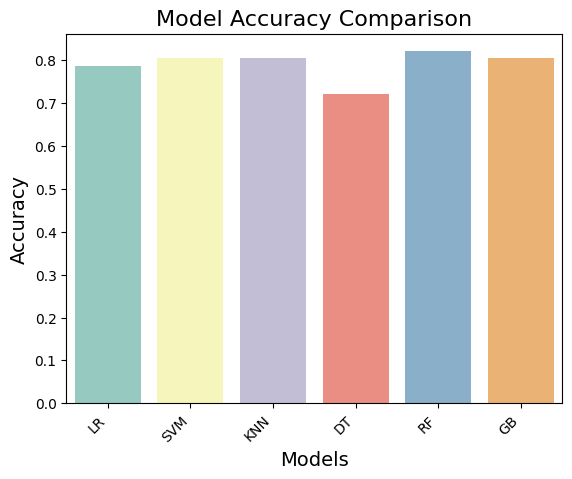

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart with model names on the x-axis and accuracy scores on the y-axis
sns.barplot(x="Models", y="Accuracy", data=final_data, palette="Set3")

# Set the title and labels
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()


Since the random forest classifier has the highest accuracy, we will choose it to test on the whole data set.

In [53]:
x_final = df2.drop('target', axis = 1)
y_final = df2['target']

In [54]:
x_final.shape

(302, 13)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()
rf.fit(x_final, y_final)

RandomForestClassifier()

In [57]:
import pandas as pd

In [58]:
# create a new dataframe to test the model
new_data = pd.DataFrame([
    {
        'age': 52,
        'sex': 1,
        'cp': 0,
        'trestbps': 125,
        'chol': 212,
        'fbs': 0,
        'restecg': 1,
        'thalach': 168,
        'exang': 0,
        'oldpeak': 1.0,
        'slope': 2,
        'ca': 2,
        'thal': 3
    },
    {
        'age': 60,
        'sex': 0,
        'cp': 1,
        'trestbps': 135,
        'chol': 250,
        'fbs': 1,
        'restecg': 0,
        'thalach': 145,
        'exang': 1,
        'oldpeak': 2.5,
        'slope': 0,
        'ca': 1,
        'thal': 2
    },
    {
        'age': 55,
        'sex': 1,
        'cp': 3,
        'trestbps': 140,
        'chol': 290,
        'fbs': 0,
        'restecg': 1,
        'thalach': 150,
        'exang': 0,
        'oldpeak': 1.2,
        'slope': 2,
        'ca': 0,
        'thal': 2
    },
    {
        'age': 45,
        'sex': 1,
        'cp': 0,
        'trestbps': 130,
        'chol': 230,
        'fbs': 0,
        'restecg': 1,
        'thalach': 170,
        'exang': 0,
        'oldpeak': 0.5,
        'slope': 1,
        'ca': 0,
        'thal': 3
    },
    {
        'age': 65,
        'sex': 0,
        'cp': 2,
        'trestbps': 145,
        'chol': 275,
        'fbs': 1,
        'restecg': 0,
        'thalach': 120,
        'exang': 1,
        'oldpeak': 3.5,
        'slope': 0,
        'ca': 2,
        'thal': 3
    }
])

In [59]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,60,0,1,135,250,1,0,145,1,2.5,0,1,2
2,55,1,3,140,290,0,1,150,0,1.2,2,0,2
3,45,1,0,130,230,0,1,170,0,0.5,1,0,3
4,65,0,2,145,275,1,0,120,1,3.5,0,2,3


In [60]:
p = rf.predict(new_data)
for i in range(len(p)):
  print(f'Evaluating : Patient No. {i + 1}')
  if p[i] == 0:
    print(f'No, Patient No. {i + 1} does not have heart disease.\n')
  else :
    print(f'Yes, Patient No. {i + 1} has heart disease. Requires immediate medical attention.\n')


Evaluating : Patient No. 1
No, Patient No. 1 does not have heart disease.

Evaluating : Patient No. 2
No, Patient No. 2 does not have heart disease.

Evaluating : Patient No. 3
Yes, Patient No. 3 has heart disease. Requires immediate medical attention.

Evaluating : Patient No. 4
Yes, Patient No. 4 has heart disease. Requires immediate medical attention.

Evaluating : Patient No. 5
No, Patient No. 5 does not have heart disease.



Save the status of the ML model

In [61]:
import joblib
joblib.dump(rf, 'model_joblib_heart')

# this saved model can be stored, loaded and used as required.

['model_joblib_heart']

In [62]:
!pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('model_joblib_heart')

# Function to show the prediction result
def show_entry_fields(b):
    try:
        # Creating a DataFrame with the input values
        data = pd.DataFrame({
            'age': [int(e1.value)],
            'sex': [int(e2.value)],
            'cp': [int(e3.value)],
            'trestbps': [int(e4.value)],
            'chol': [int(e5.value)],
            'fbs': [int(e6.value)],
            'restecg': [int(e7.value)],
            'thalach': [int(e8.value)],
            'exang': [int(e9.value)],
            'oldpeak': [float(e10.value)],
            'slope': [int(e11.value)],
            'ca': [int(e12.value)],
            'thal': [int(e13.value)]
        })

        # Making prediction
        result = model.predict(data)

        with output:
            clear_output()
            if result == 0:
                print("No Heart Disease")
            else:
                print("Possibility of Heart Disease")
    except ValueError:
        with output:
            clear_output()
            print("Please enter valid numeric values.")

# Creating the widgets
e1 = widgets.IntText(description="Age:")
e2 = widgets.IntText(description="Sex (1/0):")
e3 = widgets.IntText(description="CP:")
e4 = widgets.IntText(description="Trestbps:")
e5 = widgets.IntText(description="Chol:")
e6 = widgets.IntText(description="FBS:")
e7 = widgets.IntText(description="Restecg:")
e8 = widgets.IntText(description="Thalach:")
e9 = widgets.IntText(description="Exang:")
e10 = widgets.FloatText(description="Oldpeak:")
e11 = widgets.IntText(description="Slope:")
e12 = widgets.IntText(description="CA:")
e13 = widgets.IntText(description="Thal:")

# Button to trigger the prediction
button = widgets.Button(description="Predict", button_style='info')
button.on_click(show_entry_fields)

# Output widget to display the result
output = widgets.Output()

# Display the widgets
display(widgets.VBox([
    widgets.HTML("<h1>Heart Disease Prediction System</h1>"),
    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13,
    button,
    output
]))
